In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn
import re

In [2]:
ls ../data/raw/

'Copy of Acoli-Monolingual Corpus - Mark Phillip.xlsx'
'Copy of Lumasaba Monolingual Compilation - Mark Phillip.xlsx'
 Master_file.csv
'Runyankore - Mark Phillip.xlsx'
 Sunbird-dataset-phase1.xlsx
 Sunbird_phase_II.xlsx
 acholi.xlsx
 lug
'luganda(1).csv'
 luganda.csv
 lumasaba.xlsx
 luo
'runyankore(1).xls'
 runyankore.xls
 runyankore_c.xlsx
 swahili.csv
 swh
 weights.h5


In [3]:
!ls ..

__pycache__  data	models.py  train_model.py
config.py    losses.py	notebooks  weights


In [4]:
data = pd.read_csv('../data/raw/Master_file.csv')
lug = pd.read_csv('../data/raw/luganda.csv')
swa = pd.read_csv('../data/raw/swahili.csv')
runy = pd.read_excel('../data/raw/runyankore.xls')
runy2 = pd.read_excel('../data/raw/runyankore_c.xlsx')
lumas = pd.read_excel('../data/raw/lumasaba.xlsx')
acholi = pd.read_excel('../data/raw/acholi.xlsx')

sunbird1 = pd.read_excel('../data/raw/Sunbird-dataset-phase1.xlsx')
sunbird2 = pd.read_excel('../data/raw/Sunbird_phase_II.xlsx')

acholi_2 = pd.read_excel('../data/raw/Copy of Acoli-Monolingual Corpus - Mark Phillip.xlsx')
lumas_2 = pd.read_excel('../data/raw/Copy of Lumasaba Monolingual Compilation - Mark Phillip.xlsx')
runy_3 = pd.read_excel('../data/raw/Runyankore - Mark Phillip.xlsx')

In [5]:
sunbird1

,English,Luganda,Runyankore,Acholi,Ateso,Lugbara
0,Eggplants always grow best under warm conditions.,Bbiringanya lubeerera asinga kukulira mu mbee...,Entonga buriijo zikurira omu mbeera y'obwire e...,Bilinyanya pol kare dongo maber ka lyeto tye,Epoloi ebirinyanyi ojok apakio nu emwanar akwap.,Birinyanya eyi zo kililiru ndeni angu driza ma...
1,Farmland is sometimes a challenge to farmers.,Ettaka ly'okulimirako n'okulundirako ebiseera ...,"Eitaka ry'okuhingamu, obumwe n'obumwe nirireet...",Ngom me pur i kare mukene obedo peko madit bot...,Akiro nu alupok nes erai ationis kanejaas akoriok,Amvu ma angu eri sa'wa azini 'diyisi 'ba amvu ...
2,Farmers should be encouraged to grow more coffee.,Abalimi balina okukubirizibwa okwongera okulim...,Abahingi bashemereire kuhigwa bongyere okuhing...,Lupur omyero ki konygi wek nong miti me puru m...,Ekot aisinyikokit akoriok akoru emwanyi loepol,Le 'ba ma fe 'ba amvu 'yapi 'diyini ava kawa '...
3,Uganda is focusing on farming.,Uganda essira eritadde ku bulimi.,Uganda eteire amaani aha buhingi n'oburiisa.,Uganda tye ka keme ki lok me pur,Uganda nes ejai akiro nu akoru.,Kari Uganda niri eri asi'baza be amvu 'yaza ma...
4,Some plants die due to lack of sunlight.,Ebimera ebimu bifa olw'ebbula ly'omusana.,Ebihingwa ebimwe nibyoma ahabw'okubura omushana.,jami apita mukene too woko pien pe ginongo cen...,Icie ikorion etwakete naarai emamei akolong.,Ori azi 'diyi odra te ituka ma akosi.
...,...,...,...,...,...,...
9995,Sports activities in our school are done in th...,Ebyemizannyo mu ssomero lyaffe bikolebwa mu lu...,"Eby'emizaano omu ishomero ryaitu, nibikorwa om...",Yub me pyem tuku bedo tye i gang kwan wa i ter...,Itolosio aboliasio kosomero kosi atamu na iyar...,Ba 'yeta avita ni 'diyi 'ye amavile sukulu ri ...
9996,Teachers play a greater role in training pupil...,Abasomesa bakola omulimu gwa maanyi mu kutende...,Abeegyesa nibakora omurimo muhango omu kutende...,Lupwonye tiyo tic madit loyo i pwonyo lutino k...,Iswamaete isisianakinak aswam naepol noi aitut...,Imba'ba eyi azi okporu ndeni 'diyi nga sukulu ...
9997,Our sports teacher has been transferred to the...,Omusomesa waffe ow'ebyemizannyo akyusiddwa n'a...,"Omwegyesa waitu ow'ebyemizaano, ahinduriirwe o...",Ki kobo lapwony me tuku me gang kwan wa kitere...,Aponi ijularai esisianakinan wok lo aboliasio ...,Ba oja amavile imbapi avita eyi ma drilea ri s...
9998,The district sports team reached the finals la...,Ttiimu y'ebyemizannyo eya disitulikiti yatuuka...,"Tiimu y'emizaano eya disiturikiti, ekahika aha...",dul tuku pa dictrikme tuku guoo i agikki me py...,Abu etimu lo aboliasio lo edisitrikt odol abol...,Amuti avita eyini distrikiti niri ca abala asi...


In [6]:
sunbird2

,English,Luganda,Runyankole,Lugbara,Ateso,Acholi
0,It is important to sensitize the community aga...,Kikulu okubangula abantu ku kabi akali mu kulw...,N'ekyomugasho Okumanyitsa abantu b'ekyanga aha...,Eri kililiru 'ba yi imbazu e'yo ngirngirini ku...,Erai ibore yenepol noi aitejenikin itunga aron...,Pire tek me pwonyo lwak wek gulweny I kom buya...
1,They need to observe the sabbath day.,Balina okukwata olunaku lwa ssabbiiti.,Abantu beine okutwara eizooba rya sabiiti nk'e...,Le yi ma inzi o'du sabato niri,Inumunumete kesi aparaan naka sabato.,Myero wawor nino me Sabato.
2,They have not been paid like other regular sol...,Tebasasuddwa bulungi ng'abasirikale abalala wa...,Tibashashwire nk'amahe agandi oihireho obuhere...,"Ba ofeni yi ekile asikari azini 'diyi le ku, y...",Mam kesi etacitos isirikaalei ice karaida iswa...,Pud pe giculo-gi marom-aroma ki mony mukene ma...
3,They are not considered for loans yet other so...,Tebaweebwa mabanja wadde nga bo abasirikale ab...,Tibarikubateekateekwaho kweguuza sente kandi a...,"Ba feni yi dri mari ku, de isu 'ba fe asikari ...",Mam ecamakinitai kesi aijaun ilonin konye koca...,Pe kitingo ni guporre me nongo/gamo den kun mo...
4,Their only vehicle was not replaced last year.,Emmotoka emu yokka gye baalina tebaagizzaawo o...,Emootoka yaabo emwe t'eragarwirweho omwaka ogu...,Ba awini mutukari ci yi vileri oja eli ajeria ku,Mam aponi kisiesai ekecemotoka ediope bon koka...,Motokagi acel keken pe gileyo mwaka mukato.
...,...,...,...,...,...,...
15004,There is usually heavy traffic in the morning ...,Ebidduka bitera okuba ebingi ku makya n'akawun...,Nihakira kuba hariho omwijurirano gw'ebiiruka ...,Ipu duc amotokan korot kangitupuru keda obong.,Omita nzila drini sawa driasi ovu o'bitisi nzi...,Motoka pol kare medo dwong I gudu I odiko ki o...
15005,He promised to clear the debt by the end of th...,Yasuubiza okumalayo ebbanja ku nkomerero y'omw...,Akaraganisa kushashura akamarayo eibanja omwak...,Abu ngesi isumun aitac ebanjake kangetakinet n...,Eri so ndra oyo mari nderi ma ti ofzu de elin...,En okwonge me tyeko culo banyane ma pud mwaka ...
15006,A traffic police officer was knocked down by a...,Owa poliisi y'ebidduka yatomeddwa emmotoka eya...,Omupooriisi w'aha nguuto akatomerwa emotoka ey...,Abu emotoka loakeri keda esipidi noi konang ep...,Mutukari nzupi okposini si azi'ba polisi nzila...,Motoka ma onongo tye ka ngwec I cipid ogoyo ab...
15007,He lost his sight when he was still a baby.,Yaziba amaaso bwe yali akyali muwere.,Akahuma akiri omwereere.,Abu ngesi kotwania akekonye nearaar ngesi ikoku.,Eri avi i ma mile angu ndrezuri de nga eri ode...,En wange oto I kare ma en pud tidi.


In [7]:
data

,English Sentence,Acoli Translation,Luganda Translation,Lumasaaba Translation,Runyakore Translation
0,The government has constructed better health c...,Gamente oyubo odi yadi mabeco ikin gang.,Gavumenti ezimbye amalwaliro agasingako obulun...,Linamboo Lyombekhele kamakangillo kamalayi mub...,Gavumenti eyombekire amarwariro amarungi omu b...
1,His death was so sudden.,Toone obedo atura.,Enfa ye yali ya kibwatukira.,Khuufwa khwe Khwobele Khwokhangu,Akafa ekitaraariraine.
2,Our company celebrated twenty years of existen...,Kampuniwa okwero mwaka pyere aryo me rii.,Omwaka oguwedde kampuni yaffe yajaguza emyaka ...,Sitongoole syeffe syekhoyele kimiko kabili kye...,"Kampuni yaitu ekajaguza emyaka makumi abiri, e..."
3,Many people have lost their lives due to sexua...,Dano mapol gurwenyo kwogi pi two makobo ki ibuto.,Abantu bangi abafudde olw'endwadde z'ekikaba.,Bbabandu bakaalii bafwiile khulwe bulwale bwe ...,Abantu baingi bafiire ahabw'endwara z'obushamb...
4,Civil servants receive their pension fund upon...,Lutic pa gamente gigamo centegi me pencon ka g...,Abakozi ba gavumenti bafuna akasiimo kaabwe ng...,Barambi be Linambo baba wumula kye linambo baf...,Abakozi ba gavumenti nibatunga akasiimo kaabo ...
...,...,...,...,...,...
4766,His brother was murdered last year.,Omine kineko i mwaka ma okato ni.,Muganda we yatemulwa omwaka oguwedde.,Wanaye bamwira kumwiko kubirire.,NaN
4767,Laws prohibiting same-sex were first put in pl...,Cik ma gengo butu i kin laco ki laco onyo dako...,Amateeka agakugira okwegatta wakati w'abantu a...,Kamakmabila ka khasisa bye khubira inyuma kany...,NaN
4768,We have not changed our laws since independence.,"Nicakke ma wanong kwede loc ken, pud pe waloko...",Tetukyusanga mateeka gaffe okuva lwe twafuna o...,Sikhwa yusa kamakambila kefwe khukhwama imbuka...,NaN
4769,The law has several important provisions.,Cik eni tye ki jami mogo mapol ma pigi tego.,Etteeka lirimu obutundu bungi obw'omugaso.,Likambila lili ni tsisakya tsye kumukaso nabbi.,NaN


In [8]:
lug

,language
0,Abadde atawaanyizibwa endwadde z'ekibumba.
1,Vision Group yaakukwatagana ne URSB okukituuki...
2,Kisse omuvubuka ow'emyaka 17 abadde akisulamu.
3,baweereddwa ebirabo.
4,ABataano abaasukkuluma baakutwalibwa e China o...
...,...
2689,OMUVUBUKA eyakwatiddwa ku gw'okumenya amayumba...
2690,"Abanene okuli mmeeya w’e Lubaga, Joyce Ssebugg..."
2691,Mmeeya wa Makindye Ssaabagabo Gerald Lumbuye N...
2692,Sentebe wa Buyinja-Kasangati e kyalo ewawangaa...


In [9]:
swa

,language
0,taarifa hiyo ilisema kuwa ongezeko la joto la...
1,aidha ilisema kuwa mwelekeo wa kupungua kwa j...
2,mwelekeo wa mvua wa septemba hadi desemba ish...
3,ilifafanua kuwa msimu wa vuli UNK maeneo amba...
4,katika maeneo hayo mvua zinatarajiwa kunyesha...
...,...
42063,sioni kama bwana mengi amefanya ujasiri wowot...
42064,jambo la busara ilikuwa kuchukua ushahidi ali...
42065,kama rais UNK ushahidi huo ndipo UNK na kuele...
42066,profesa lipumba alidai bwana mengi anacheza k...


In [10]:
runy.iloc[:,0]

0       Ebigyenderwaho omu kooti y’ekyanga  etebeekani...
1       Ba memba ba kooti bashemereire kufayo munonga ...
2                    Reeba Ebiragiro bya kooti z’ebyanga.
3       Okuhaburwa okundi okweyongyeireho kuri omu  Ng...
4       okuhurira omushango Kutandika kuhurira omushan...
                              ...                        
1771                                boona ni banywani be.
1772        kweyihaho engambo zirikumusiisira ekitiinisa.
1773       August atandika kurira ngu okuhoza kugumizemu.
1774    Agira ngu kimutwariire bingikureeba ngu areesi...
1775    Atwire nanteera kumaraemyaka 10 n'okurengamu.\...
Name: N’emishango eri omu kooti eshemereire eine  kukuuma obugabe bw’abo boona abarikugiizamu  kurabira omu muhanda oguri gwe., Length: 1776, dtype: object

In [11]:
lumas.iloc[:,0]

0                Byesi kulima bilini ku tundiwa mu katale.
1                                    Usana wilinde musale.
2                               Inzila yefe inzila indeyi.
3                              Bageni badabula namwe pawo?
4        Ilomba nabi Baba Wele agende ninawe mu zinzila...
                               ...                        
10382    Isomelo,nasasulekho tsinusu shisintsa,tsiramil...
10383    Papawenywe ashili akhuleyi busa,anatabula mang...
10384            Nakhumanya uwama khuyila umwaana wowo ta.
10385                   Mwareye wahena kamaleesi ko mwana?
10386          Nimwakamilewo khuramba mutsye muwumulekho .
Name: Lumasaaba Nothern and Southern Dialect, Length: 10387, dtype: object

In [12]:
acholi

,Kwai Nyig lok I leb Acholi
0,Abicito i gang kwan.
1,Abipwonyo litino ki kwan.
2,Abiloko kit ma akwano kwede woko.
3,Abedo ka kwano buk baibol.
4,Abalo kwan pa latin nyako ni woko.
...,...
10097,En owaco ki anyakani ni pi tye cok kenyo.
10098,Kiwace ni wel ojol pi ijeriken egini weng.
10099,En otye cawa manok keken.
10100,Mam dong in imito ni amini cente adi?


In [13]:
runy2

,Ni Kristo wenka oikiriziibwe,Unnamed: 1
0,"N'eshagama ya Yesu yonka, eyaasheeshekire aha ...",NaN
1,Eikiriziibwe Ruhanga aha bw'ebibi by'omuntu.,NaN
2,Eshagama ye y'omuhendo eine amaani gataine buk...,NaN
3,"Embabazi n'obusaasizi, ahabwaitu, akabihangura.",NaN
4,Ni Yesu wenka owaabaasize kwikiriza,NaN
...,...,...
14374,NaN,Ebicu tibyataaguka.
14375,NaN,"Ekitebe kye atuura akikingiire,"
14376,NaN,Akishwekire ekicu kye.
14377,NaN,"Amaizi akagateeraho obugarukiro,"


In [14]:
# runy2[runy2.iloc[:,0].str.isdigit()]

In [15]:
# runy2=pd.concat([
#     runy2.iloc[:,0],
#     runy2.iloc[:,1]
# ]).dropna().reset_index(drop=True)



In [16]:
acholi_2

,Kwai Nyig lok I leb Acholi
0,Abicito i gang kwan.
1,Abipwonyo litino ki kwan.
2,Abiloko kit ma akwano kwede woko.
3,Abedo ka kwano buk baibol.
4,Abalo kwan pa latin nyako ni woko.
...,...
40032,Wel cente me yubo otwa dwong mada.
40033,Laconi mitoo cito ka lwok kacel ki dakone.
40034,Atye ki cokke mo kacel ki lapilidana.
40035,Atye ka yenyo tic manyen me konya nongo cente.


In [17]:
lumas_2

,Lumasaaba Nothern and Southern Dialect
0,Byesi kulima bilini ku tundiwa mu katale.
1,Usana wilinde musale.
2,Inzila yefe inzila indeyi.
3,Bageni badabula namwe pawo?
4,Ilomba nabi Baba Wele agende ninawe mu zinzila...
...,...
45202,"Isomelo,nasasulekho tsinusu shisintsa,tsiramil..."
45203,"Papawenywe ashili akhuleyi busa,anatabula mang..."
45204,Nakhumanya uwama khuyila umwaana wowo ta.
45205,Mwareye wahena kamaleesi ko mwana?


In [18]:
runy_3

,Ni Kristo wenka oikiriziibwe,Unnamed: 1
0,"N'eshagama ya Yesu yonka, eyaasheeshekire aha ...",NaN
1,Eikiriziibwe Ruhanga aha bw'ebibi by'omuntu.,NaN
2,Eshagama ye y'omuhendo eine amaani gataine buk...,NaN
3,"Embabazi n'obusaasizi, ahabwaitu, akabihangura.",NaN
4,Ni Yesu wenka owaabaasize kwikiriza,NaN
...,...,...
14374,NaN,Ebicu tibyataaguka.
14375,NaN,"Ekitebe kye atuura akikingiire,"
14376,NaN,Akishwekire ekicu kye.
14377,NaN,"Amaizi akagateeraho obugarukiro,"


In [19]:
runy_3=pd.concat([
    runy_3.iloc[:,0],
    runy_3.iloc[:,1]
]).dropna().reset_index(drop=True)



In [20]:
runy_3

0        N'eshagama ya Yesu yonka, eyaasheeshekire aha ...
1             Eikiriziibwe Ruhanga aha bw'ebibi by'omuntu.
2        Eshagama ye y'omuhendo eine amaani gataine buk...
3          Embabazi n'obusaasizi, ahabwaitu, akabihangura.
4                      Ni Yesu wenka owaabaasize kwikiriza
                               ...                        
23748                                  Ebicu tibyataaguka.
23749                      Ekitebe kye atuura akikingiire,
23750                               Akishwekire ekicu kye.
23751                     Amaizi akagateeraho obugarukiro,
23752                   Ahu omushana n'omwirima byatanira.
Length: 23753, dtype: object

#### runy2 is a subset of runy_3
#### acholi is a subset of acholi_2
#### lumas is a subset of lumas_2

In [21]:
languages = pd.concat([data['English Sentence'],
                       data['Acoli Translation'],
                       data['Luganda Translation'],
                       data['Lumasaaba Translation'],
                       data['Runyakore Translation'],
                       lug['language'],
                       swa.loc[:,'language'],
                       runy.iloc[:,0],
                       lumas_2.iloc[:,0],
                       acholi_2.iloc[:,0],
                       runy_3,
                       sunbird1['English'],
                       sunbird1['Luganda'],
                       sunbird1['Runyankore'],
                       sunbird1['Acholi'],
                       sunbird2['English'],
                       sunbird2['Luganda'],
                       sunbird2['Runyankole'],
                       sunbird2['Acholi'],
    
                       ]).reset_index(drop=True)

In [22]:
languages

0         The government has constructed better health c...
1                                  His death was so sudden.
2         Our company celebrated twenty years of existen...
3         Many people have lost their lives due to sexua...
4         Civil servants receive their pension fund upon...
                                ...                        
279421    Motoka pol kare medo dwong I gudu I odiko ki o...
279422    En okwonge me tyeko culo banyane ma pud mwaka ...
279423    Motoka ma onongo tye ka ngwec I cipid ogoyo ab...
279424                  En wange oto I kare ma en pud tidi.
279425    Gamente tiyo ki cente ma dwong adada me gero k...
Length: 279426, dtype: object

In [23]:
new_data=pd.DataFrame({'text':languages,'classes':['english']*len(data['English Sentence'])+
                                                       ['acholi']*len(data['Acoli Translation'])+
                                                       ['luganda']*len(data['Luganda Translation'])+
                                                       ['lumasaba']*len(data['Lumasaaba Translation'])+
                                                       ['runyankore']*len(data['Runyakore Translation'])+
                                                       ['luganda']*len(lug['language'])+
                                                       ['swahili']*len(swa.loc[:,'language'])+
                                                       ['runyankore']*len(runy.iloc[:,0])+
                                                       ['lumasaba']*len(lumas_2.iloc[:,0])+
                                                       ['acholi']*len(acholi_2.iloc[:,0])+
                                                       ['runyankore']*len(runy_3)+
                                                       ['english']*len(sunbird1['English'])+
                                                       ['luganda']*len(sunbird1['Luganda'])+
                                                       ['runyankore']*len(sunbird1['Runyankore'])+
                                                       ['acholi']*len(sunbird1['Acholi'])+
                                                       ['english']*len(sunbird2['English'])+
                                                       ['luganda']*len(sunbird2['Luganda'])+
                                                       ['runyankore']*len(sunbird2['Runyankole'])+
                                                       ['acholi']*len(sunbird2['Acholi'])
                                                      }).reset_index(drop=True)

In [24]:
 new_data

,text,classes
0,The government has constructed better health c...,english
1,His death was so sudden.,english
2,Our company celebrated twenty years of existen...,english
3,Many people have lost their lives due to sexua...,english
4,Civil servants receive their pension fund upon...,english
...,...,...
279421,Motoka pol kare medo dwong I gudu I odiko ki o...,acholi
279422,En okwonge me tyeko culo banyane ma pud mwaka ...,acholi
279423,Motoka ma onongo tye ka ngwec I cipid ogoyo ab...,acholi
279424,En wange oto I kare ma en pud tidi.,acholi


In [25]:
new_data.classes.unique()

array(['english', 'acholi', 'luganda', 'lumasaba', 'runyankore',
       'swahili'], dtype=object)

In [26]:
new_data[new_data.classes=='english']

,text,classes
0,The government has constructed better health c...,english
1,His death was so sudden.,english
2,Our company celebrated twenty years of existen...,english
3,Many people have lost their lives due to sexua...,english
4,Civil servants receive their pension fund upon...,english
...,...,...
234394,There is usually heavy traffic in the morning ...,english
234395,He promised to clear the debt by the end of th...,english
234396,A traffic police officer was knocked down by a...,english
234397,He lost his sight when he was still a baby.,english


In [27]:
new_data[new_data.classes=='acholi']

,text,classes
4771,Gamente oyubo odi yadi mabeco ikin gang.,acholi
4772,Toone obedo atura.,acholi
4773,Kampuniwa okwero mwaka pyere aryo me rii.,acholi
4774,Dano mapol gurwenyo kwogi pi two makobo ki ibuto.,acholi
4775,Lutic pa gamente gigamo centegi me pencon ka g...,acholi
...,...,...
279421,Motoka pol kare medo dwong I gudu I odiko ki o...,acholi
279422,En okwonge me tyeko culo banyane ma pud mwaka ...,acholi
279423,Motoka ma onongo tye ka ngwec I cipid ogoyo ab...,acholi
279424,En wange oto I kare ma en pud tidi.,acholi


In [28]:
new_data[new_data.classes=='luganda']

,text,classes
9542,Gavumenti ezimbye amalwaliro agasingako obulun...,luganda
9543,Enfa ye yali ya kibwatukira.,luganda
9544,Omwaka oguwedde kampuni yaffe yajaguza emyaka ...,luganda
9545,Abantu bangi abafudde olw'endwadde z'ekikaba.,luganda
9546,Abakozi ba gavumenti bafuna akasiimo kaabwe ng...,luganda
...,...,...
249403,Ebidduka bitera okuba ebingi ku makya n'akawun...,luganda
249404,Yasuubiza okumalayo ebbanja ku nkomerero y'omw...,luganda
249405,Owa poliisi y'ebidduka yatomeddwa emmotoka eya...,luganda
249406,Yaziba amaaso bwe yali akyali muwere.,luganda


In [29]:
new_data[new_data.classes=='lumasaba']

,text,classes
14313,Linamboo Lyombekhele kamakangillo kamalayi mub...,lumasaba
14314,Khuufwa khwe Khwobele Khwokhangu,lumasaba
14315,Sitongoole syeffe syekhoyele kimiko kabili kye...,lumasaba
14316,Bbabandu bakaalii bafwiile khulwe bulwale bwe ...,lumasaba
14317,Barambi be Linambo baba wumula kye linambo baf...,lumasaba
...,...,...
115595,"Isomelo,nasasulekho tsinusu shisintsa,tsiramil...",lumasaba
115596,"Papawenywe ashili akhuleyi busa,anatabula mang...",lumasaba
115597,Nakhumanya uwama khuyila umwaana wowo ta.,lumasaba
115598,Mwareye wahena kamaleesi ko mwana?,lumasaba


In [30]:
new_data[new_data.classes=='runyankore']

,text,classes
19084,Gavumenti eyombekire amarwariro amarungi omu b...,runyankore
19085,Akafa ekitaraariraine.,runyankore
19086,"Kampuni yaitu ekajaguza emyaka makumi abiri, e...",runyankore
19087,Abantu baingi bafiire ahabw'endwara z'obushamb...,runyankore
19088,Abakozi ba gavumenti nibatunga akasiimo kaabo ...,runyankore
...,...,...
264412,Nihakira kuba hariho omwijurirano gw'ebiiruka ...,runyankore
264413,Akaraganisa kushashura akamarayo eibanja omwak...,runyankore
264414,Omupooriisi w'aha nguuto akatomerwa emotoka ey...,runyankore
264415,Akahuma akiri omwereere.,runyankore


In [31]:
new_data[new_data.classes=='swahili']

,text,classes
26549,taarifa hiyo ilisema kuwa ongezeko la joto la...,swahili
26550,aidha ilisema kuwa mwelekeo wa kupungua kwa j...,swahili
26551,mwelekeo wa mvua wa septemba hadi desemba ish...,swahili
26552,ilifafanua kuwa msimu wa vuli UNK maeneo amba...,swahili
26553,katika maeneo hayo mvua zinatarajiwa kunyesha...,swahili
...,...,...
68612,sioni kama bwana mengi amefanya ujasiri wowot...,swahili
68613,jambo la busara ilikuwa kuchukua ushahidi ali...,swahili
68614,kama rais UNK ushahidi huo ndipo UNK na kuele...,swahili
68615,profesa lipumba alidai bwana mengi anacheza k...,swahili


In [32]:
new_data[new_data.text.isna()]

,text,classes
23136,NaN,runyankore
23137,NaN,runyankore
23138,NaN,runyankore
23139,NaN,runyankore
23140,NaN,runyankore
...,...,...
23853,NaN,runyankore
23854,NaN,runyankore
114533,NaN,lumasaba
193390,NaN,luganda


In [33]:
new_data=new_data.dropna().reset_index(drop=True)
new_data.text=new_data.text.astype(str)

In [34]:
new_data[new_data.text.isna()]

,text,classes


In [35]:
import string
def split_sent(text):
    text = text.split("'")
    text = " ".join(text)
    text = text.split(u'\u2019')       ###remove "’"
    text = " ".join(text)
    text = text.split('\u201d') 
    text = " ".join(text)
    text = text.split('\u201c')
    text = " ".join(text)
    return text

def remove_short_word_char(text):
    text= [word for word in text.split() if len(word)>3]
    text = " ".join(text)
    return text
    
def remove_punctuation(text):
    table = str.maketrans("","",string.punctuation)
    return text.translate(table)

def to_lower(text):
    text =[word.lower() for word in text.split(' ')]
    return " ".join(text)

In [36]:
new_data.text = new_data.text.apply(split_sent)
'''
input: Abantu bangi abafudde olw'endwadde z'ekikaba.
returns: 'Abantu bangi abafudde olw endwadde z ekikaba.'
'''
new_data.text = new_data.text.apply(remove_short_word_char)
'''
imput:  'Abantu bangi abafudde olw endwadde z ekikaba.'
returns: 'Abantu bangi abafudde endwadde ekikaba.'
'''
new_data.text=new_data.text.apply(remove_punctuation)
new_data.text=new_data.text.apply(to_lower)
new_data.text=new_data.text.apply(lambda x: re.sub("\d+","",x))  #remove digits

In [37]:
pd.options.display.max_colwidth=None

In [38]:
new_data=new_data[new_data.text.apply(lambda x:len(x.split())>3)] ### remove short word sentences

In [39]:
# new_data = new_data.reset_index(drop=True)

In [40]:
new_data[new_data.text.isna()]

,text,classes


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'acholi'),
  Text(1, 0, 'swahili'),
  Text(2, 0, 'runyankore'),
  Text(3, 0, 'lumasaba'),
  Text(4, 0, 'luganda'),
  Text(5, 0, 'english')])

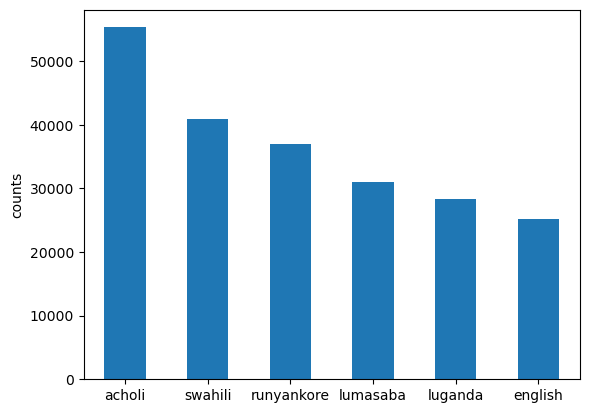

In [41]:
new_data.classes.value_counts().plot.bar()
plt.ylabel('counts')
plt.xticks(rotation=0)

In [42]:
# index_todrop=new_data[new_data.classes=='swahili'].iloc[15000:].index.tolist()   ### reduce swahili sentences
# index_todrop

In [43]:
# new_data=new_data.drop(index_todrop)

In [44]:
new_data = new_data.reset_index(drop=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'acholi'),
  Text(1, 0, 'swahili'),
  Text(2, 0, 'runyankore'),
  Text(3, 0, 'lumasaba'),
  Text(4, 0, 'luganda'),
  Text(5, 0, 'english')])

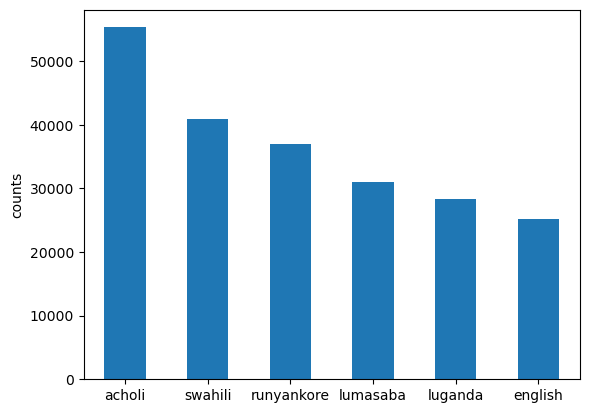

In [45]:
new_data.classes.value_counts().plot.bar()
plt.ylabel('counts')
plt.xticks(rotation=0)

In [46]:
english_luganda=new_data[new_data.classes.isin(['english','luganda'])].reset_index(drop=True)

In [47]:
english_luganda

,text,classes
0,government constructed better health centers rural areas,english
1,company celebrated twenty years existence last year,english
2,many people have lost their lives sexually transmitted diseases,english
3,civil servants receive their pension fund upon retirement,english
4,teachers also among civil servants,english
...,...,...
53578,ebidduka bitera okuba ebingi makya akawungeezi,luganda
53579,yasuubiza okumalayo ebbanja nkomerero omwaka,luganda
53580,poliisi ebidduka yatomeddwa emmotoka eyabadde eweenyuka,luganda
53581,yaziba amaaso yali akyali muwere,luganda


In [48]:
english_luganda['folds'] =-1
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5)
for i,(train_idx,val_idx) in enumerate(skf.split(english_luganda,english_luganda.classes)):
    english_luganda.loc[val_idx,'folds']=i

In [49]:
english_luganda

,text,classes,folds
0,government constructed better health centers rural areas,english,0
1,company celebrated twenty years existence last year,english,0
2,many people have lost their lives sexually transmitted diseases,english,0
3,civil servants receive their pension fund upon retirement,english,0
4,teachers also among civil servants,english,0
...,...,...,...
53578,ebidduka bitera okuba ebingi makya akawungeezi,luganda,4
53579,yasuubiza okumalayo ebbanja nkomerero omwaka,luganda,4
53580,poliisi ebidduka yatomeddwa emmotoka eyabadde eweenyuka,luganda,4
53581,yaziba amaaso yali akyali muwere,luganda,4


In [50]:
el_classes = pd.get_dummies(english_luganda.classes)

In [51]:
english_luganda = pd.concat([english_luganda.text,
           english_luganda.folds,
          el_classes],1)

/tmp/ipykernel_13450/2593988199.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  english_luganda = pd.concat([english_luganda.text,


In [52]:
english_luganda

,text,folds,english,luganda
0,government constructed better health centers rural areas,0,1,0
1,company celebrated twenty years existence last year,0,1,0
2,many people have lost their lives sexually transmitted diseases,0,1,0
3,civil servants receive their pension fund upon retirement,0,1,0
4,teachers also among civil servants,0,1,0
...,...,...,...,...
53578,ebidduka bitera okuba ebingi makya akawungeezi,4,0,1
53579,yasuubiza okumalayo ebbanja nkomerero omwaka,4,0,1
53580,poliisi ebidduka yatomeddwa emmotoka eyabadde eweenyuka,4,0,1
53581,yaziba amaaso yali akyali muwere,4,0,1


In [53]:
new_data['folds'] =-1
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5)
for i,(train_idx,val_idx) in enumerate(skf.split(new_data,new_data.classes)):
    new_data.loc[val_idx,'folds']=i

In [54]:
new_data

,text,classes,folds
0,government constructed better health centers rural areas,english,0
1,company celebrated twenty years existence last year,english,0
2,many people have lost their lives sexually transmitted diseases,english,0
3,civil servants receive their pension fund upon retirement,english,0
4,teachers also among civil servants,english,0
...,...,...,...
217842,cukulwa onongo awano gudu,acholi,4
217843,motoka kare medo dwong gudu odiko otyeno,acholi,4
217844,okwonge tyeko culo banyane mwaka otum,acholi,4
217845,motoka onongo ngwec cipid ogoyo abili doro motoka gudu,acholi,4


In [55]:
ohe_classes = pd.get_dummies(new_data.classes)

In [56]:
new_data = pd.concat([new_data.text,
           new_data.folds,
          ohe_classes],1)

/tmp/ipykernel_13450/900613341.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_data = pd.concat([new_data.text,


In [57]:
new_data

,text,folds,acholi,english,luganda,lumasaba,runyankore,swahili
0,government constructed better health centers rural areas,0,0,1,0,0,0,0
1,company celebrated twenty years existence last year,0,0,1,0,0,0,0
2,many people have lost their lives sexually transmitted diseases,0,0,1,0,0,0,0
3,civil servants receive their pension fund upon retirement,0,0,1,0,0,0,0
4,teachers also among civil servants,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
217842,cukulwa onongo awano gudu,4,1,0,0,0,0,0
217843,motoka kare medo dwong gudu odiko otyeno,4,1,0,0,0,0,0
217844,okwonge tyeko culo banyane mwaka otum,4,1,0,0,0,0,0
217845,motoka onongo ngwec cipid ogoyo abili doro motoka gudu,4,1,0,0,0,0,0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Fold 0'),
  Text(1, 0, 'Fold 1'),
  Text(2, 0, 'Fold 2'),
  Text(3, 0, 'Fold 3'),
  Text(4, 0, 'Fold 4')])

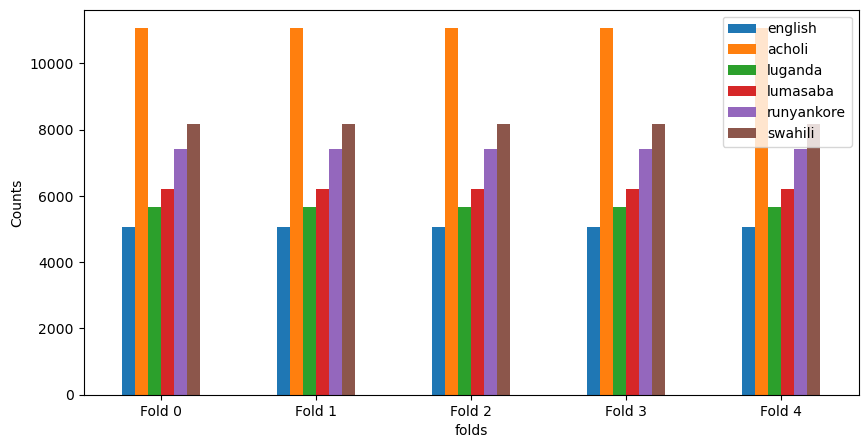

In [58]:
fold_distributions=new_data.groupby('folds')[['english','acholi','luganda','lumasaba','runyankore','swahili']].sum()
plt.rcParams["figure.figsize"] = (10,5)
fold_distributions.rename({0:'Fold 0',1:'Fold 1',2:'Fold 2',3:'Fold 3',4:'Fold 4'}).plot(kind='bar')
plt.ylabel('Counts')
plt.xticks(rotation=0)

In [59]:
!ls ../data/processed

english_luganda.csv  processed_2.csv  processed_5.csv
metadata.csv	     processed_3.csv  processed_5_with_all_sentences.csv
metadata_@40000.csv  processed_4.csv
processed_1.csv      processed_5


In [60]:
new_data.to_csv('../data/processed/processed_6.csv',index=False)    #save processed data
english_luganda.to_csv("../data/processed/english_luganda2.csv",index=False)

In [61]:
import pandas as pd..
from collections import Counter.

SyntaxError: invalid syntax (97324999.py, line 1)

In [ ]:
new_dat = pd.read_csv('../data/processed/processed_6.csv')

In [ ]:
# new_dat=new_dat.dropna()

In [ ]:
new_dat[new_dat.text.isna()]

In [ ]:
train_data=new_data[new_data.folds.isin([0,1,2])].reset_index(drop=True)
test_data = new_data[new_data.folds==3]

In [ ]:
' '.join(train_data.text.values.tolist())

In [ ]:
train_corpus = ' '.join(train_data.text.values.tolist())
train_corpus_list=train_corpus.split()

test_corpus = ' '.join(test_data.text.values.tolist())
test_corpus_list=test_corpus.split()

In [ ]:
count = Counter()
for i in train_data.text.values:
    for word in i.split():
        count[word]+=1

In [ ]:
len(count)

In [ ]:
len(Counter(train_corpus_list).values())

In [ ]:
len(Counter(test_corpus_list).values())

In [ ]:
len(set(train_corpus_list) &set(test_corpus_list)) ## common words in both train and test

In [ ]:
len(set(train_corpus_list).intersection(test_corpus_list))

In [ ]:
set(test_corpus_list)-(set(train_corpus_list).intersection(test_corpus_list))

In [ ]:
'kuwayiliza' in train_corpus_list

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
def extract_eval_data(file):
    with open(file,'r') as f:
        lines = f.readlines()
    lines=lines[:40000]
    data=[]
    for line in lines:
        data.append(line.rstrip())
    return data

In [ ]:
lug=extract_eval_data('../data/raw/lug')
swh=extract_eval_data('../data/raw/swh')
luo=extract_eval_data('../data/raw/luo')

In [ ]:
lug

In [ ]:
metadata=pd.DataFrame({'text':lug+swh+luo,'classes':['luganda']*len(lug)+\
                                           ['swahili']*len(swh)+\
                                           ['luo']*len(luo)})

In [ ]:
metadata.text = metadata.text.apply(split_sent)

metadata.text = metadata.text.apply(remove_short_word_char)

metadata.text=metadata.text.apply(remove_punctuation)
metadata.text=metadata.text.apply(to_lower)
metadata.text=metadata.text.apply(lambda x: re.sub("\d+","",x))  #remove digits

metadata=metadata[metadata.text.apply(lambda x:len(x.split())>3)] ### remove short word sentences

In [ ]:
metadata

In [ ]:
# metadata.to_csv('../data/processed/metadata_@40000.csv',index=False)

In [ ]:
metadata = ' '.join(pd.read_csv('../data/processed/metadata_@40000.csv').text.to_list())

In [ ]:
metadata_list = metadata.split()

In [ ]:
len(Counter(metadata_list))

In [ ]:
len(set(train_corpus_list).intersection(metadata_list))